In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("/Users/pep/Downloads/Great_Outdoors_Data_SQLite/GO_SALES_PRODUCT_FORECASTData.csv")
df

,PRODUCT_NUMBER,YEAR,MONTH,EXPECTED_VOLUME
0,44,2022,12,383
1,45,2021,1,80
2,45,2021,2,51
3,45,2021,3,214
4,45,2021,4,300
...,...,...,...,...
3867,115,2022,8,282
3868,115,2022,9,920
3869,115,2022,10,1081
3870,115,2022,11,398


In [25]:
x = df.drop('EXPECTED_VOLUME', axis=1)
y = df.loc[:, ['EXPECTED_VOLUME']]
x

,PRODUCT_NUMBER,YEAR,MONTH
0,44,2022,12
1,45,2021,1
2,45,2021,2
3,45,2021,3
4,45,2021,4
...,...,...,...
3867,115,2022,8
3868,115,2022,9
3869,115,2022,10
3870,115,2022,11


In [40]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.15,
    random_state=42
)

In [41]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(x_train, y_train)
reg_model

LinearRegression()

In [42]:
y_pred = reg_model.predict(x_test)
y_pred

array([[513.67177807],
       [637.71650096],
       [640.57898083],
       [521.32996165],
       [471.15386638],
       [536.61214086],
       [531.82112312],
       [533.26945703],
       [653.29242569],
       [518.27165142],
       [480.79962909],
       [580.96067525],
       [557.7436609 ],
       [546.3480967 ],
       [635.13839468],
       [586.02365858],
       [635.89828628],
       [524.38358592],
       [573.20926245],
       [502.7889559 ],
       [550.94797005],
       [481.95118139],
       [592.62048299],
       [517.87695463],
       [556.38083415],
       [568.7321203 ],
       [508.22182   ],
       [547.61300827],
       [553.90836511],
       [490.45007776],
       [632.17331367],
       [536.9991156 ],
       [573.60395924],
       [553.24170272],
       [519.41851776],
       [470.00700004],
       [641.152414  ],
       [620.90048067],
       [579.41911212],
       [636.09411663],
       [551.70786165],
       [587.92269446],
       [559.74833401],
       [588

In [43]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns={ 0 : 'Predicted_volume'})
prediction_df

,Predicted_volume
0,513.671778
1,637.716501
2,640.578981
3,521.329962
4,471.153866
...,...
576,560.593733
577,589.167476
578,585.820106
579,617.268737


In [44]:
y_test_prediction_merge = pd.concat([y_test.reset_index()['EXPECTED_VOLUME'], prediction_df], axis=1)
y_test_prediction_merge.loc[y_test_prediction_merge['Predicted_volume'].notna(), :]

,EXPECTED_VOLUME,Predicted_volume
0,275,513.671778
1,3106,637.716501
2,59,640.578981
3,67,521.329962
4,64,471.153866
...,...,...
576,338,560.593733
577,233,589.167476
578,308,585.820106
579,554,617.268737


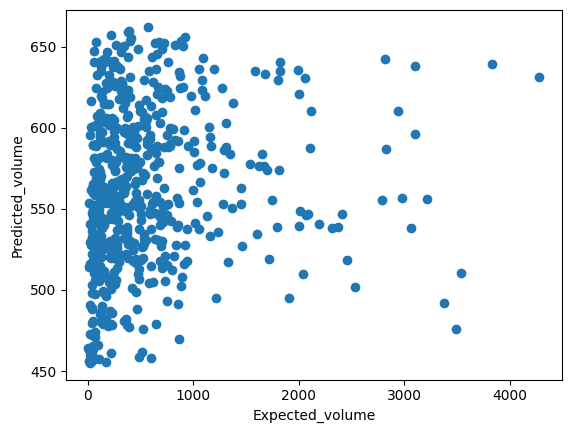

In [45]:
plt.scatter(y_test_prediction_merge['EXPECTED_VOLUME'], y_test_prediction_merge['Predicted_volume'])
plt.xlabel('Expected_volume')
plt.ylabel('Predicted_volume')
plt.show()

In [46]:
mean_squared_error(y_test_prediction_merge['EXPECTED_VOLUME'], y_test_prediction_merge['Predicted_volume'])

401183.1442668509

In [47]:
mean_absolute_error(y_test_prediction_merge['EXPECTED_VOLUME'], y_test_prediction_merge['Predicted_volume'])

426.3440092809828